# Facial Emotion Classification

## importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [2]:
train_dir = '../input/fer2013/train/'
test_dir = '../input/fer2013/test/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       surprise  fear  angry  neutral   sad  disgust  happy
train      3171  4097   3995     4965  4830      436   7215
      surprise  fear  angry  neutral   sad  disgust  happy
test       831  1024    958     1233  1247      111   1774


### PLot of number of images in training set

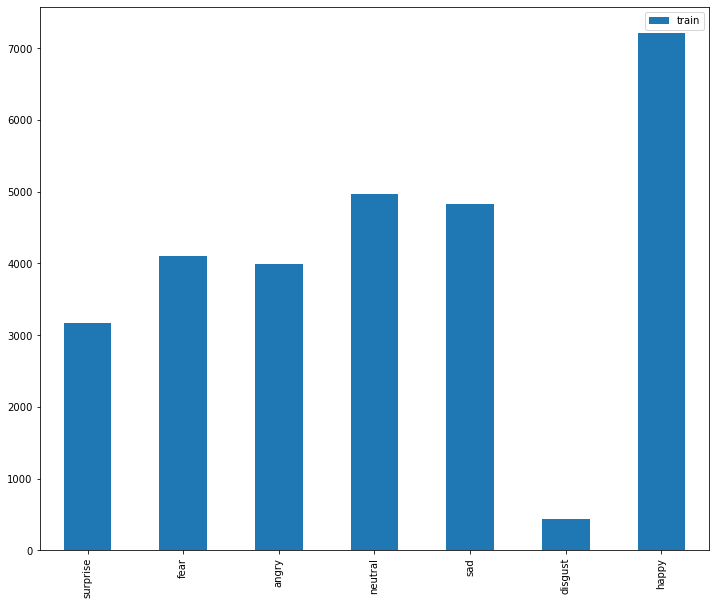

In [3]:

train_count.transpose().plot(kind='bar', figsize=(12,10))

### PLot of number of images in test set

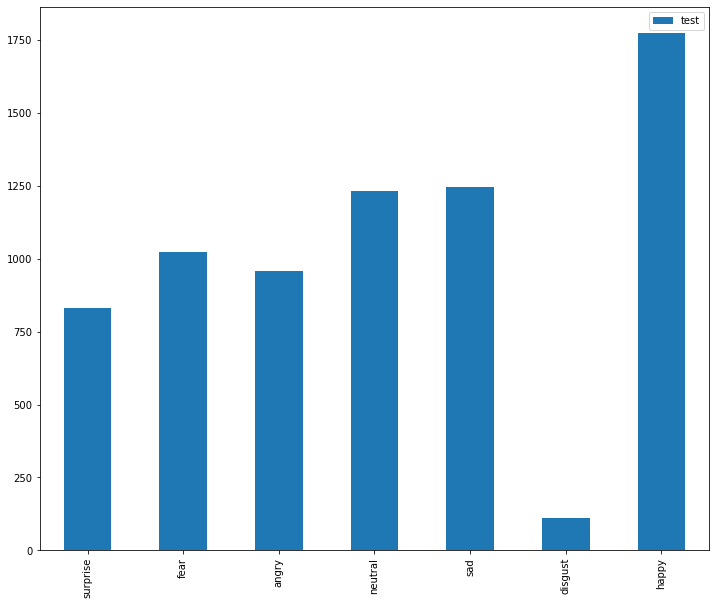

In [4]:
test_count.transpose().plot(kind='bar',figsize=(12, 10))

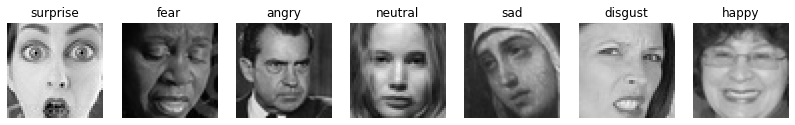

In [5]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [6]:
image_size= 48
batch_size= 64
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(image_size, image_size),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(image_size, image_size),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

## Defining Model

In [8]:
def model_1(input_size, classes=7):
     
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [9]:
def model_2(input_size, classes=7):
    model= tf.keras.models.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
    model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(256,(5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    

    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #Faltten the model
    model.add(Flatten())
    
    
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(classes, activation='softmax'))
    opt = Adam(lr=0.0001 , decay=1e-6)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary
    return model
    

In [10]:
model_1 = model_1((row,col,1), classes)
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       2

In [11]:
model_2 = model_2((row,col,1), classes)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 256)      

### Callbacks Function

In [14]:
chk_path = 'model_1.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

## Training Model

In [15]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = model_1.fit(x=training_set,
                 validation_data=test_set,
                 epochs=60,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/60
448/448 [==============================] - ETA: 0s - loss: 4.2621 - accuracy: 0.2825
Epoch 00001: val_loss improved from inf to 5.89510, saving model to model_1.h5
448/448 [==============================] - 200s 445ms/step - loss: 4.2621 - accuracy: 0.2825 - val_loss: 5.8951 - val_accuracy: 0.2245
Epoch 2/60
448/448 [==============================] - ETA: 0s - loss: 3.4402 - accuracy: 0.3365
Epoch 00002: val_loss improved from 5.89510 to 3.04425, saving model to model_1.h5
448/448 [==============================] - 42s 94ms/step - loss: 3.4402 - accuracy: 0.3365 - val_loss: 3.0442 - val_accuracy: 0.4032
Epoch 3/60
448/448 [==============================] - ETA: 0s - loss: 2.9360 - accuracy: 0.3714
Epoch 00003: val_loss improved from 3.04425 to 2.67280, saving model to model_1.h5
448/448 [==============================] - 43s 95ms/step - loss: 2.9360 - accuracy: 0.3714 - val_loss: 2.6728 - val_accuracy: 0.4057
Epoch 4/60
448/448 [==============================] - ETA: 0s - lo

# Check Model_2

In [16]:
chk_path_2 = 'model_2.h5'
log_dir_2 = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint_2 = ModelCheckpoint(filepath=chk_path_2,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop_2 = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback_2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_2, histogram_freq=1)
csv_logger_2 = CSVLogger('training.log')

callback_2 = [checkpoint_2, reduce_lr_2, csv_logger_2]

In [17]:


model_2_hist = model_2.fit(x=training_set,
                 validation_data=test_set,
                 epochs=60,
                 callbacks=callback_2,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/60
448/448 [==============================] - ETA: 0s - loss: 9.6740 - accuracy: 0.2288
Epoch 00001: val_loss improved from inf to 8.59083, saving model to model_2.h5
448/448 [==============================] - 42s 95ms/step - loss: 9.6740 - accuracy: 0.2288 - val_loss: 8.5908 - val_accuracy: 0.2468
Epoch 2/60
448/448 [==============================] - ETA: 0s - loss: 7.6321 - accuracy: 0.2684
Epoch 00002: val_loss improved from 8.59083 to 6.62521, saving model to model_2.h5
448/448 [==============================] - 41s 92ms/step - loss: 7.6321 - accuracy: 0.2684 - val_loss: 6.6252 - val_accuracy: 0.2828
Epoch 3/60
448/448 [==============================] - ETA: 0s - loss: 5.8764 - accuracy: 0.3031
Epoch 00003: val_loss improved from 6.62521 to 5.05899, saving model to model_2.h5
448/448 [==============================] - 42s 94ms/step - loss: 5.8764 - accuracy: 0.3031 - val_loss: 5.0590 - val_accuracy: 0.3304
Epoch 4/60
448/448 [==============================] - ETA: 0s - loss

## Loss and Accuracy plot

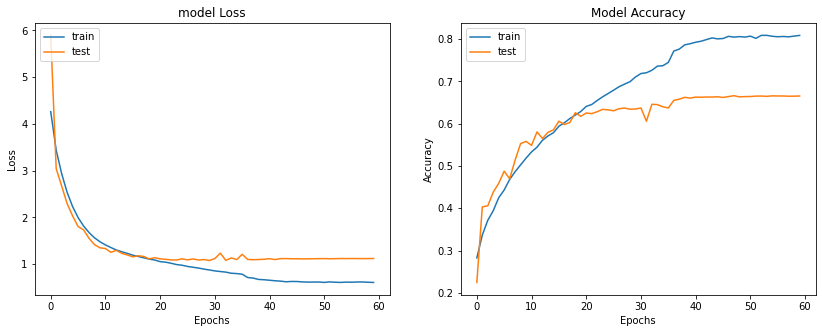

In [18]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

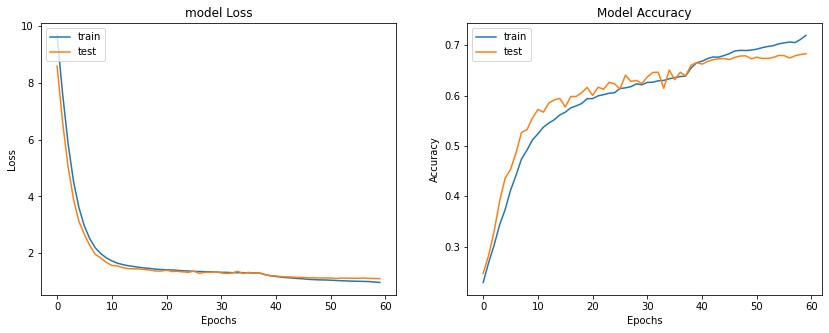

In [19]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(model_2_hist.history['accuracy'])
plt.plot(model_2_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(model_2_hist.history['loss'])
plt.plot(model_2_hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Model 2 shows best result , so we will approach that.**

We see that model 2 has less overfitting as compared to model 1 and also a decent accuracy, we can see that using two fully connected layers with same no. of units can yield a better result, the parameters collected by the filters are less in no. hence giving a better general result.

### Model evaluation

In [20]:
def model_data(model):
    train_loss, train_accu = model.evaluate(training_set)
    test_loss, test_accu = model.evaluate(test_set)
    return print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

In [21]:
model_data(model_1)

113/113 [==============================] - 5s 48ms/step - loss: 1.1206 - accuracy: 0.6656
final train accuracy = 88.49 , validation accuracy = 66.56


In [22]:
model_data(model_2)

113/113 [==============================] - 5s 48ms/step - loss: 1.1011 - accuracy: 0.6828
final train accuracy = 77.85 , validation accuracy = 68.28


In [23]:
model_1.save_weights('model_1_bestweight.h5')

In [24]:
model_2.save_weights('model_2_bestweight.h5')

### Confusion Matrix and Classification on training set

Confusion Matrix
[[ 493   61  446 1052  801  698  444]
 [  70   10   45  112   76   75   48]
 [ 510   57  448 1045  770  769  498]
 [ 898  115  779 1897 1408 1272  846]
 [ 679   79  506 1305  930  884  582]
 [ 617   88  480 1211  949  901  584]
 [ 414   42  342  798  619  576  380]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.12      0.13      3995
     disgust       0.02      0.02      0.02       436
        fear       0.15      0.11      0.13      4097
       happy       0.26      0.26      0.26      7215
     neutral       0.17      0.19      0.18      4965
         sad       0.17      0.19      0.18      4830
    surprise       0.11      0.12      0.12      3171

    accuracy                           0.18     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.18      0.17     28709



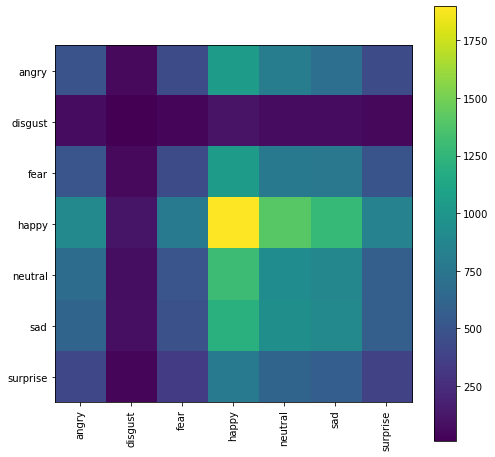

In [25]:
y_pred = model_2.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

### Confusion Matrix and Classification on test set

Confusion Matrix
[[130  12 125 252 185 159  95]
 [ 14   0  16  25  26  16  14]
 [149   9 131 233 213 172 117]
 [244  14 189 434 343 324 226]
 [189  11 136 300 254 199 144]
 [152  14 144 315 226 239 157]
 [109   3  98 219 163 139 100]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.14      0.13       958
     disgust       0.00      0.00      0.00       111
        fear       0.16      0.13      0.14      1024
       happy       0.24      0.24      0.24      1774
     neutral       0.18      0.21      0.19      1233
         sad       0.19      0.19      0.19      1247
    surprise       0.12      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.15      7178
weighted avg       0.18      0.18      0.18      7178



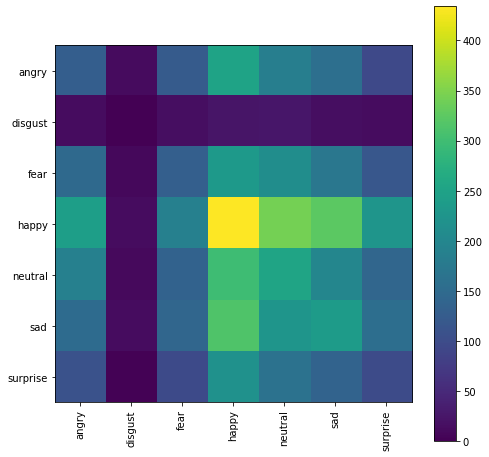

In [26]:
y_pred = model_1.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)